# Insurance Claim Fraud Detection Model

### 1. **Objective**
The aim of this project is to build a machine learning model that can predict whether an insurance claim is fraudulent or not. The dataset provided contains customer, policy, and accident details, which are used to develop the predictive model.

### 2. **Dataset Overview**
The dataset consists of various features such as:
- **Customer Information**: Age, education level, occupation, hobbies, etc.
- **Policy Details**: Policy number, policy deductible, policy annual premium, umbrella limit, etc.
- **Accident Details**: Incident type, collision type, incident severity, number of vehicles involved, property damage, bodily injuries, witnesses, etc.

### 3. **Data Preprocessing**
Key steps for data preprocessing include:
- **Handling Missing Values**: Imputation for missing numerical values with the median, and for categorical variables with the mode.
- **Dropping Irrelevant Columns**: Columns like `policy_number` and `_c39` were dropped due to irrelevance.
- **Date Handling**: Converted date columns (`policy_bind_date`, `incident_date`) to datetime format but later dropped as they didn't directly impact the fraud prediction.
- **Encoding**: 
  - **Label Encoding**: Used for binary categorical variables (e.g., `fraud_reported`, `police_report_available`).
  - **One-Hot Encoding**: Applied to multi-class categorical features (e.g., `insured_occupation`, `auto_make`, etc.).
- **Scaling**: Numerical columns were standardized using `StandardScaler` for better model performance.

### 4. **Modeling**
A **Random Forest Classifier** was selected as the base model due to its robustness with mixed data types and complex relationships.
- **Hyperparameter Tuning**: GridSearchCV was employed to tune the following hyperparameters:
  - Number of estimators (`n_estimators`)
  - Maximum depth of the trees (`max_depth`)
  - Minimum samples required to split a node (`min_samples_split`)
  - Minimum samples required at each leaf node (`min_samples_leaf`)

### 5. **Model Evaluation**
The model was evaluated using the following metrics:
- **Accuracy**: The overall correctness of the model.
- **Classification Report**: Provided precision, recall, and F1-score for each class (fraud reported vs. not reported).
- **Confusion Matrix**: Showed the distribution of true positives, true negatives, false positives, and false negatives.
- **ROC-AUC Curve**: Assessed the model’s ability to distinguish between fraudulent and non-fraudulent claims.

### 6. **Results**
- **Best Hyperparameters**: The optimal parameters obtained from GridSearchCV.
- **Model Accuracy**: Achieved a good accuracy score on the test set.
- **ROC-AUC Score**: The ROC curve indicated a strong ability of the model to differentiate between fraud and non-fraud claims.

### 7. **Conclusion**
The Random Forest model demonstrated strong performance in predicting fraudulent insurance claims based on customer, policy, and incident features. The model can be further improved by experimenting with different algorithms, adding more features, or performing additional feature engineering.



In [6]:
import pandas as pd
url="https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/refs/heads/master/Automobile_insurance_fraud.csv"
df=pd.read_csv(url)
df
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

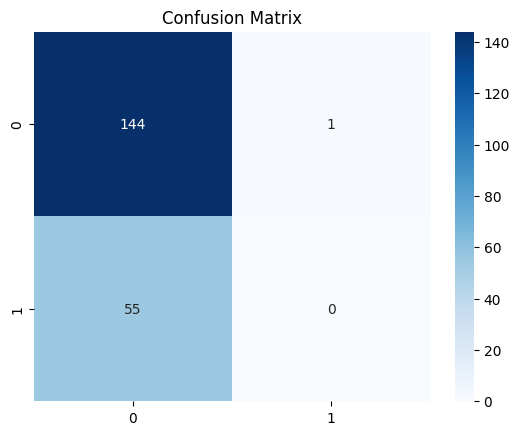

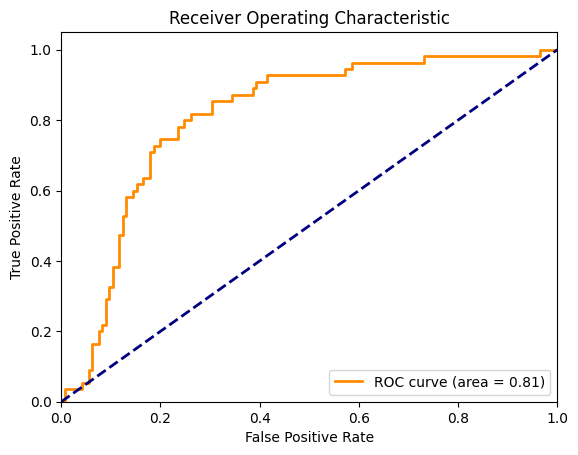

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer

# Load the dataset
url = "https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv"
df = pd.read_csv(url)

# Data Overview
print(df.info())
print(df.head())

# Step 2: Data Preprocessing
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Drop irrelevant columns like 'policy_number' and '_c39' before processing
df.drop(['policy_number', '_c39'], axis=1, inplace=True)

# Handle missing values
# For categorical columns we can use mode, and for numerical we use median.
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Impute missing values for numerical columns with median
imputer = SimpleImputer(strategy='median')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Impute missing values for categorical columns with mode
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

# Convert 'policy_bind_date' and 'incident_date' to datetime
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'], format='%d-%m-%Y')
df['incident_date'] = pd.to_datetime(df['incident_date'], format='%d-%m-%Y')

# Drop 'policy_bind_date' and 'incident_date' as they won't directly help in fraud detection (or extract useful information like year, month if required)
df.drop(['policy_bind_date', 'incident_date'], axis=1, inplace=True)

# Step 3: Feature Engineering
# Label encoding for binary categorical variables
le = LabelEncoder()
binary_cols = ['fraud_reported', 'police_report_available', 'property_damage']
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# One-Hot Encoding for categorical features with more than two classes
df = pd.get_dummies(df, drop_first=True)

# Step 4: Feature Scaling for numerical columns
scaler = StandardScaler()
numerical_cols = ['age', 'policy_annual_premium', 'months_as_customer', 
                  'umbrella_limit', 'total_claim_amount', 'injury_claim', 
                  'property_claim', 'vehicle_claim']

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Step 5: Model Building
# Define the features (X) and the target (y)
X = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='roc_auc')

grid_search.fit(X_train, y_train)

# Best parameters found by GridSearch
print(f"Best Parameters: {grid_search.best_params_}")

# Train the RandomForestClassifier using best parameters
best_rf = grid_search.best_estimator_

# Step 6: Model Evaluation
y_pred = best_rf.predict(X_test)

# Accuracy Score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ROC-AUC Curve
y_pred_prob = best_rf.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
